In [428]:
#EDA
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
from imblearn.over_sampling import SMOTE
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import scipy.stats as stats
#preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer,SimpleImputer
from pandas_profiling import ProfileReport
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
#Manipulation
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [429]:
df=pd.read_excel('Dummy dataset.xlsx')

In [430]:
df.head()

Total O/S  TENOR_@Booking  ... GENDER              Customer_Segment
0  178630.00             120  ...   MALE                      Salaried
1  376444.57             120  ...   MALE                      Salaried
2  253984.28              84  ...   MALE                      Salaried
3  779620.11             108  ...   MALE  Self Employed & Professional
4  103377.43              60  ...   MALE                      Salaried

[5 rows x 11 columns]

In [431]:
df.describe()

Total O/S  TENOR_@Booking           DPD           AGE
count  3.868500e+04    38685.000000  38685.000000  38601.000000
mean   1.851946e+05       86.300271     13.760838     44.144009
std    5.719265e+05       27.832914     63.639185     10.003271
min    5.000000e-02       12.000000      0.000000    -76.269863
25%    3.599904e+04       60.000000      0.000000     36.941096
50%    9.071416e+04       84.000000      0.000000     43.434247
75%    1.869215e+05      108.000000      0.000000     50.875342
max    8.170000e+07      120.000000   2470.000000     86.341096

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38685 entries, 0 to 38684
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Total O/S         38685 non-null  float64       
 1   TENOR_@Booking    38685 non-null  int64         
 2   Loan Term         38685 non-null  object        
 3   BOOKING_DATE      38685 non-null  datetime64[ns]
 4   MATURITY_DATE     38685 non-null  datetime64[ns]
 5    DPD              38685 non-null  int64         
 6   DOB               38601 non-null  datetime64[ns]
 7   AGE               38601 non-null  float64       
 8   AGE at Maturity   38601 non-null  object        
 9   GENDER            38677 non-null  object        
 10  Customer_Segment  38666 non-null  object        
dtypes: datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 3.2+ MB


In [433]:
df.shape

(38685, 11)

In [434]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [435]:
df.dropna(inplace=True)

In [436]:
df.isnull().sum()

Total O/S           0
TENOR_@Booking      0
Loan Term           0
BOOKING_DATE        0
MATURITY_DATE       0
 DPD                0
DOB                 0
AGE                 0
AGE at Maturity     0
GENDER              0
Customer_Segment    0
dtype: int64

We will have to convert all the columns of the numeric nature to float as they are saved as objects in the dataframe

In [437]:
numeric_col=['Total O/S','Loan Term','AGE','AGE at Maturity']
df['AGE at Maturity'] = pd.to_numeric(df['AGE at Maturity'], errors='coerce')
df['Loan Term']=df['Loan Term'].str.extract(r'(^\d*)') #remove 'years' from the number of years
df['Loan Term'] = pd.to_numeric(df['Loan Term'], errors='coerce')

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37779 entries, 0 to 38684
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Total O/S         37779 non-null  float64       
 1   TENOR_@Booking    37779 non-null  int64         
 2   Loan Term         32976 non-null  float64       
 3   BOOKING_DATE      37779 non-null  datetime64[ns]
 4   MATURITY_DATE     37779 non-null  datetime64[ns]
 5    DPD              37779 non-null  int64         
 6   DOB               37779 non-null  datetime64[ns]
 7   AGE               37779 non-null  float64       
 8   AGE at Maturity   37735 non-null  float64       
 9   GENDER            37779 non-null  object        
 10  Customer_Segment  37779 non-null  object        
dtypes: datetime64[ns](3), float64(4), int64(2), object(2)
memory usage: 3.5+ MB


In [439]:
df.head()

Total O/S  TENOR_@Booking  ...  GENDER              Customer_Segment
0  178630.00             120  ...    MALE                      Salaried
1  376444.57             120  ...    MALE                      Salaried
2  253984.28              84  ...    MALE                      Salaried
3  779620.11             108  ...    MALE  Self Employed & Professional
4  103377.43              60  ...    MALE                      Salaried

[5 rows x 11 columns]

In [440]:
df['GENDER'].value_counts()

MALE      31713
FEMALE     6058
Male          7
Female        1
Name: GENDER, dtype: int64

In [441]:
df.replace('Male','MALE',inplace=True)
df.replace('Female','FEMALE',inplace=True)
df['GENDER'].value_counts()

MALE      31720
FEMALE     6059
Name: GENDER, dtype: int64

# Univariate Anaylsis

## Preprocesssing and adding new features


In [442]:
df['late_months']= pd.DataFrame(pd.DatetimeIndex(df.MATURITY_DATE).year * 12 + pd.DatetimeIndex(df.MATURITY_DATE).month -  (pd.DatetimeIndex(df.BOOKING_DATE).year * 12 + pd.DatetimeIndex(df.BOOKING_DATE).month))

In [443]:
df['late_months'].fillna(0, inplace=True)

In [444]:
(df['AGE']<18).value_counts()

False    37684
True        95
Name: AGE, dtype: int64

In [445]:
df['months_late_count'] = abs(df['late_months'] - df['TENOR_@Booking'])

In [446]:
import calendar
df['loan_month'] =  pd.DataFrame(pd.DatetimeIndex(df.BOOKING_DATE).month)

In [447]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [448]:
df['loan_month']

0        7.0
1        3.0
2        5.0
3        4.0
4        4.0
        ... 
38680    9.0
38681    9.0
38682    9.0
38683    9.0
38684    9.0
Name: loan_month, Length: 37779, dtype: float64

# **Total O/S Distribution**

In [449]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['Total O/S'],name='Total loan Plot',boxmean=True)
tr2=go.Histogram(x=df['Total O/S'],name='Total loan Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_xaxes(range=[0,1100000])

fig.update_layout(height=700, width=2500, title_text="Distribution of loans", )
fig.show()




## **Age Distribution**

In [450]:
(df['AGE']<0).value_counts()

False    37723
True        56
Name: AGE, dtype: int64



*   **It doesn't make sense to have customers with age less than zero so we are going to drop these rows**
*  **Also no one can take a loan if they are under 18 years old so we are going to drop these rows as well**



In [451]:
df.drop(list(df.loc[lambda _df: 18> _df["AGE"]].index),inplace=True)

In [452]:
(df['AGE']<18).value_counts()

False    37684
Name: AGE, dtype: int64

In [453]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['AGE'],name='Age Box Plot',boxmean=True)
tr2=go.Histogram(x=df['AGE'],name='Age Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=2500, title_text="Distribution of Clients' Ages:")
fig.show()



*  **The age follows a normal distribution.**
*   **The mean age is 44.2**



In [454]:
df['AGE'].mean()

44.21516271576298

**The age of in-dept customers**

In [455]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df.query('months_late_count > 1').AGE.values,name='In-dept age Plot',boxmean=True)
tr2=go.Histogram(x=df.query('months_late_count > 1').AGE.values,name='In-dept Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

#fig.update_xaxes(range=[0,2000000])

fig.update_layout(height=700, width=2500, title_text="Distribution of loans", )
fig.show()

In [456]:
df.query('months_late_count > 1').AGE.value_counts

<bound method IndexOpsMixin.value_counts of 0        38.469863
1        58.212329
2        56.806849
5        32.061644
7        26.190411
           ...    
38680    46.135616
38681    41.609589
38682    41.398630
38683    36.935616
38684    38.886301
Name: AGE, Length: 35463, dtype: float64>

## **Gender and Gender vs. Segment**

In [457]:
fig = make_subplots(
    rows=2, cols=2,subplot_titles=('','<b>Salaried','<b>Self-Employed<b>'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "pie"}] ,
           [None                               ,{"type": "pie"}]            ,                                      
          ]
)

fig.add_trace(
    go.Pie(values=df.GENDER.value_counts().values,labels=['<b>Male<b>','<b>Female<b>'],hole=0.3,pull=[0,0.3]),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=['Male Salaried', 'Female Salaried'],
        values=df.query('Customer_Segment == "Salaried" ').GENDER.value_counts().values,
        pull=[0,0.05,0.5],
        hole=0.3
        
    ),
    row=1, col=2
)

fig.add_trace(
    go.Pie(
        labels=['Male self-employed', 'Female self-employed'],
        values=df.query('Customer_Segment == "Self Employed & Professional" ').GENDER.value_counts().values,
        pull=[0,0.2,0.5],
        hole=0.3
    ),
    row=2, col=2
)



fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Distribution Of Gender And Customer Segment<b>",
)

fig.show()



*   **More samples of males in our dataset are compared to females.**
* **There are more self-employed and professional males than salaried males**
* **There are more salaried females than salaried males**
*  **Genders are not uniformly distributed**



**That was an overall clssification. Let's look at the ones who only haven't paid in due.**

In [458]:
fig = make_subplots(
    rows=2, cols=2,subplot_titles=('','<b>Salaried','<b>Self-Employed<b>'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "pie"}] ,
           [None                               ,{"type": "pie"}]            ,                                      
          ]
)

fig.add_trace(
    go.Pie(values=df.GENDER.value_counts().values,labels=['<b>Male<b>','<b>Female<b>'],hole=0.3,pull=[0,0.3]),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=['Male Salaried', 'Female Salaried'],
        values=df.query('Customer_Segment == "Salaried" and months_late_count > 1').GENDER.value_counts().values,
        pull=[0,0.05,0.5],
        hole=0.3
        
    ),
    row=1, col=2
)

fig.add_trace(
    go.Pie(
        labels=['Male self-employed', 'Female self-employed'],
        values=df.query('Customer_Segment == "Self Employed & Professional" and months_late_count > 1').GENDER.value_counts().values,
        pull=[0,0.2,0.5],
        hole=0.3
    ), row=2, col=2
)



fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Distribution Of Gender And Customer Segment<b>",
)

fig.show()

* **The number of in-debt salaried women is 280**
* **The number of in-debt salaried men is 1267**
* **The number of in-debt self-employed women is 92**
* **The number of in-debt self-employed men is 603**

**Conclusion** : Salried segment tend to pay after due more than the self-employed and profissional segments, which makes sense as the self-employed segment genrally makes more money.

## **Segment and Segment Vs. Total loan**

In [459]:
fig = px.histogram(df, x="Customer_Segment", barmode='group')
fig.show()

In [460]:
fig = px.histogram(df, x="Customer_Segment",color='GENDER', barmode='group')
fig.show()

**As stated above, the salaried segement is much larger than the self employed and the males are generally larger in both categories.**

In [461]:
mean_loan_salaried = df[df['Customer_Segment'] == "Salaried"]['Total O/S'].mean()
mean_loan_profissional = df[df['Customer_Segment'] == "Self Employed & Professional"]['Total O/S'].mean()

In [462]:
mean_loan_salaried

112408.42711755604

In [463]:
fig = px.histogram(df, x='Total O/S', color='Customer_Segment')
fig.update_xaxes(range=[0,750000])
''' fig.add_vline(x=mean_loan_salaried,
              line_width=3,
              line_dash="dash",
              line_color="darkblue",
              annotation_text="Mean loan salaried: " + str(round(mean_loan_salaried, 2)),
              annotation_font_size=18,
              annotation_font_color="darkblue",
              annotation_y = 0.5)

fig.add_vline(x=mean_loan_profissional,
              line_width=3,
              line_dash="dash",
              line_color="crimson",
              annotation_text="Mean loan profissional: " + str(round(mean_loan_profissional, 2)),
              annotation_font_size=18,
              annotation_font_color="crimson") '''
fig.show()

**The Self Employed & Professional tend to take higher loans, which makes sense as this is what fits their financial needs.**

## **Most active booking months**

In [464]:
fig = px.histogram(df, x="loan_month", barmode='group')
fig.show()

**We can see that September and October are the most active months, in which there is a higher financial demand for loans.**

# **Feature Correlation**

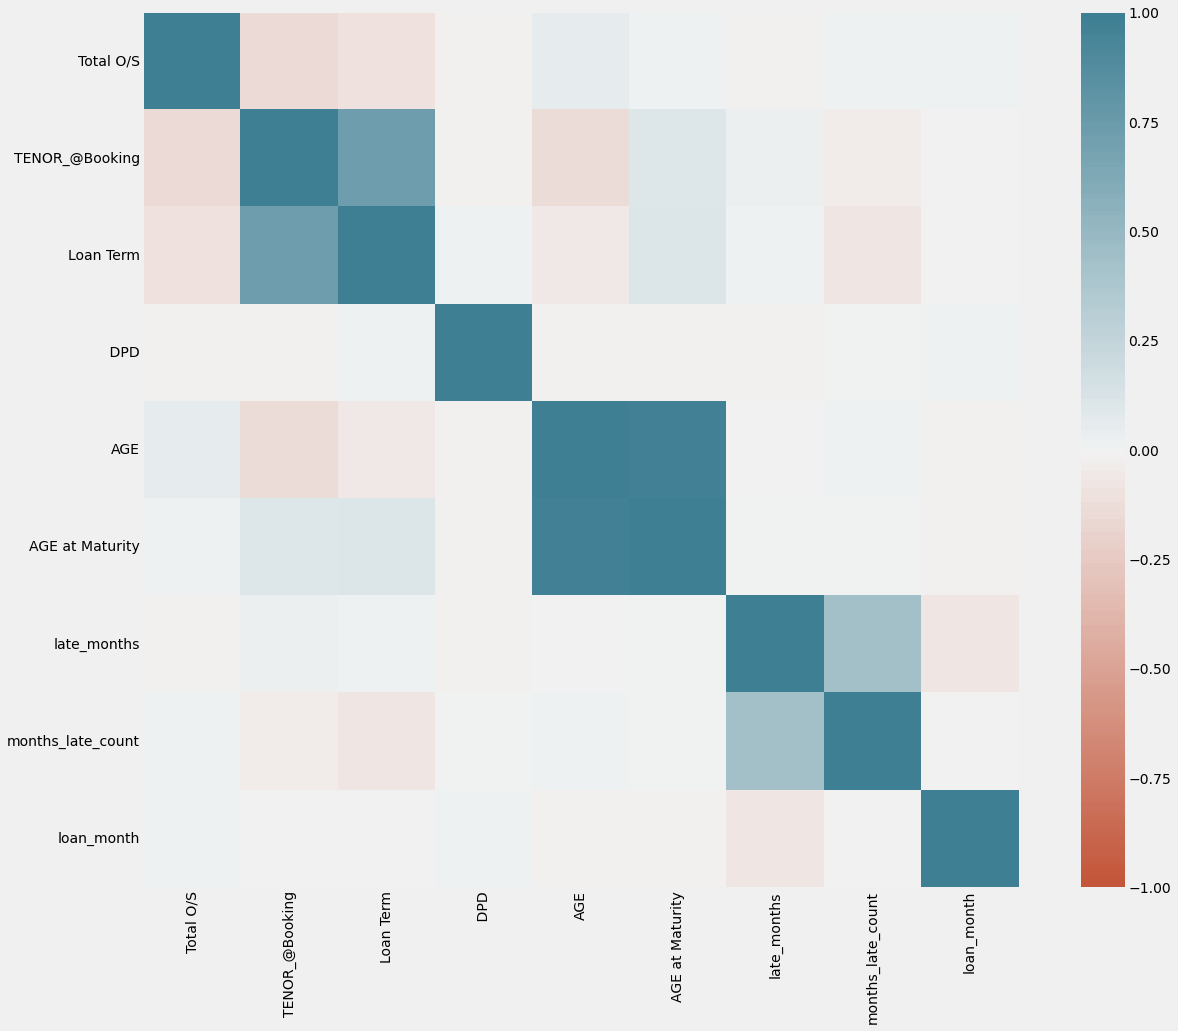

In [465]:
corr_mat=df.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr_mat, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# Clustering

In [466]:
dff=df.copy(deep=True)

We will use total loan, loan Term, DPD, AGE for clustering as these are the essential features provided in the dataset. The rest are simply derived data.

In [467]:
c_cols=['Total O/S', 'TENOR_@Booking', ' DPD']

Then using the elbow method to determine the optimal number of k-clusters

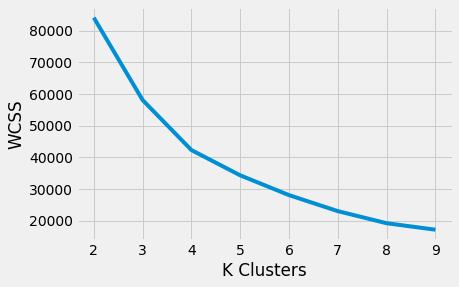

In [468]:
wcss=[] # refers to within clusters sum of squares
for i in range (2,10):
  KM=KMeans(n_clusters=i,max_iter=500,n_init=10,random_state=1)
  scaler=StandardScaler()
  data=scaler.fit_transform(dff[c_cols])
  KM.fit(data)
  wcss.append(KM.inertia_)
plt.plot(range(2,10),wcss)
plt.xlabel('K Clusters')
plt.ylabel('WCSS')
plt.show()

Seeing that the curve starts to flatten at almost 5 we are going to choose 5 clusters as a rough estimate

Next we will use Principal Component Analysis method to reduce the dimensionality to two features perserving most of the original information. We will build a pipeline containg the standard scaler and the pca transformer as well as the kmeans clusterer which will make data manipulation easier

In [469]:
preprocessor=Pipeline([("scaler",StandardScaler()),("pca",PCA(n_components=2, random_state=1))])
cluster=Pipeline([("kmeans",KMeans(n_clusters=5,n_init=50,max_iter=500,random_state=1))])
pipe=Pipeline([("preprocessor",preprocessor),("cluster",cluster)])
pipe.fit(dff[c_cols])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=1))])),
                ('cluster',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=1))]))])

We will use the silhouette score as a metric for measuring the perfromance of out clusters ; that is how much variance is explained and how close are the observations within the cluster. The range of the score if 0-1 and the higher the better. We will transform the data using the pipleine and also add labels to our clusters for visualization

In [470]:
data_preprocessed=pipe["preprocessor"].transform(dff[c_cols])
c_labels=pipe["cluster"]["kmeans"].labels_
ss=silhouette_score(data_preprocessed,c_labels)
print('Silhouette Score is ',ss)

Silhouette Score is  0.5651269283887612


Next step is to visualize the clusters on a scatter plot, but first we will group the the PCA scores into a new dataframe and add the predicted cluster to each observation

In [471]:
df_clusters=pd.DataFrame(pipe["preprocessor"].transform(dff[c_cols]),columns=["PCA_1","PCA_2"])

In [472]:
df_clusters["cluster_no"]=pipe["cluster"]["kmeans"].labels_

Visualizing

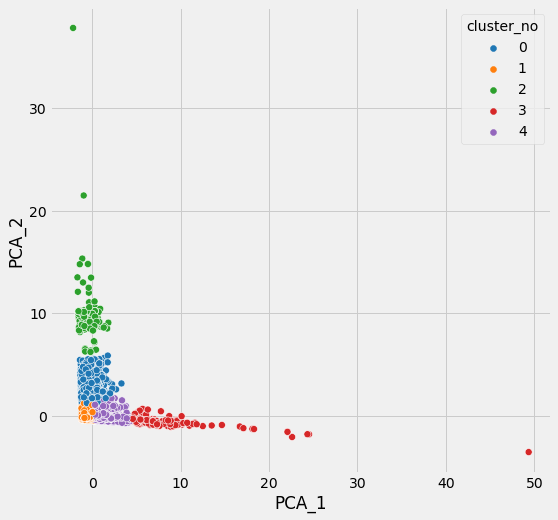

In [473]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
sp=sns.scatterplot(data=df_clusters,x='PCA_1',y='PCA_2',s=50,hue='cluster_no',palette='tab10')
plt.show()

## Examining the differences and patterns of clusters

**Cluster distribution:**


*   How many customers are in each cluster



In [474]:
dff['cluster']=pipe['cluster']['kmeans'].labels_
dff.head()

Total O/S  TENOR_@Booking  Loan Term  ... months_late_count loan_month  cluster
0  178630.00             120       10.0  ...               3.0        7.0        1
1  376444.57             120       10.0  ...               8.0        3.0        1
2  253984.28              84        7.0  ...              10.0        5.0        4
3  779620.11             108        9.0  ...               0.0        4.0        4
4  103377.43              60        5.0  ...               0.0        4.0        4

[5 rows x 15 columns]

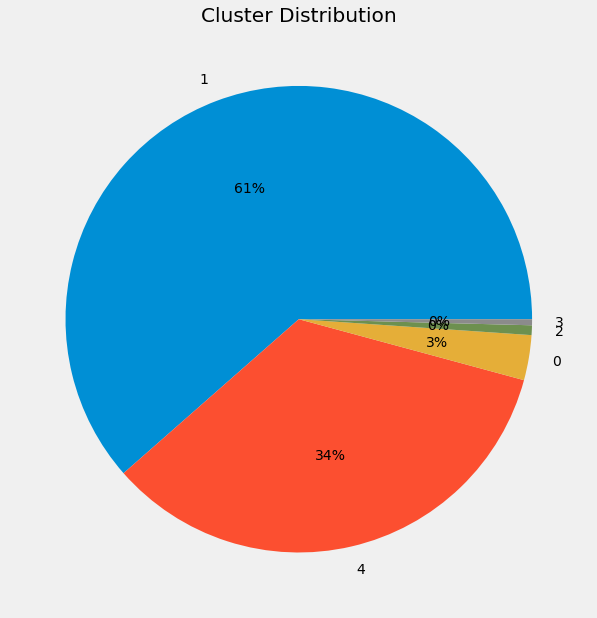

In [475]:
fig, axs = plt.subplots(figsize=(14,10))
dff['cluster'].value_counts().plot.pie(title='Cluster Distribution',autopct='%0.1d%%',ylabel='')
plt.title=False
plt.show()

Most customers fall into either cluster 1 or 4 and only a few of them fall into the other groups

**AGE** : 

*   We will use a histogram the examine the distribution of ages within each cluster





In [476]:
#fig,hplot=plt.subplots(2,3)
#sns.histplot(df)

**Gender:**
* We will use a pie chart for gender distribution within each cluster



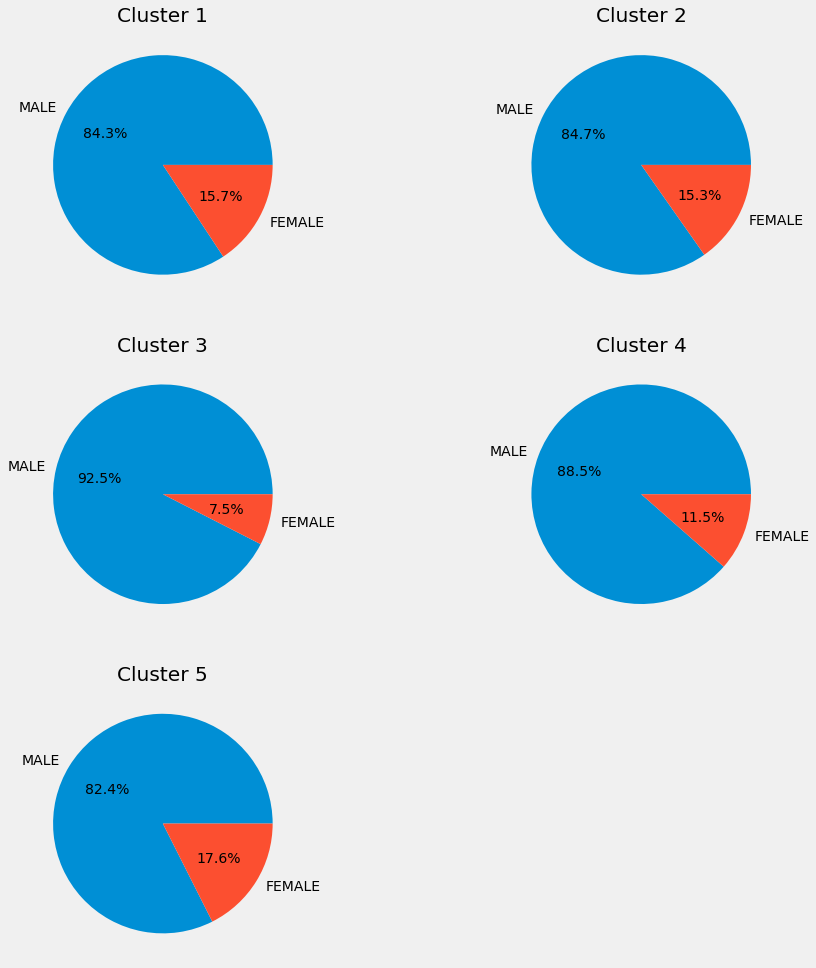

In [477]:
fig,axs=plt.subplots(3,2,figsize=(14,16))
dff[dff['cluster']==0]['GENDER'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0,0],ylabel='',title='Cluster 1',autopct='%.1f%%')
dff[dff['cluster']==1]['GENDER'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0,1],ylabel='',title='Cluster 2',autopct='%.1f%%')
dff[dff['cluster']==2]['GENDER'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1,0],ylabel='',title='Cluster 3',autopct='%.1f%%')
dff[dff['cluster']==3]['GENDER'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1,1],ylabel='',title='Cluster 4',autopct='%.1f%%')
dff[dff['cluster']==4]['GENDER'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[2,0],ylabel='',title='Cluster 5',autopct='%.1f%%')
dff[dff['cluster']==5]['GENDER'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[2,1],ylabel='',autopct='%.1f%%')


In [478]:
dff[dff['cluster']==0][' DPD']

126      150
164       89
216      331
223      138
226      119
        ... 
38654    280
38657    218
38677    159
38679    122
38684    136
Name:  DPD, Length: 1176, dtype: int64

# **Age Distribution for all clusters**

In [479]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=dff[dff['cluster']==0]['AGE'],name='Total loan Plot',boxmean=True)
tr2=go.Histogram(x=dff[dff['cluster']==0]['AGE'],name='Total loan Histogram')

fig.add_trace(tr2,row=2,col=1)
fig.add_trace(tr1,row=1,col=1)


fig.update_layout(height=700, title_text="Distribution of Cluster 1 Ages", )
fig.show()

In [480]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=dff[dff['cluster']==1]['AGE'],name='Total loan Plot',boxmean=True)
tr2=go.Histogram(x=dff[dff['cluster']==1]['AGE'],name='Total loan Histogram')

fig.add_trace(tr2,row=2,col=1)
fig.add_trace(tr1,row=1,col=1)


fig.update_layout(height=700, title_text="Distribution of Cluster 2 Ages", )
fig.show()

In [481]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=dff[dff['cluster']==2]['AGE'],name='Total loan Plot',boxmean=True)
tr2=go.Histogram(x=dff[dff['cluster']==2]['AGE'],name='Total loan Histogram')

fig.add_trace(tr2,row=2,col=1)
fig.add_trace(tr1,row=1,col=1)


fig.update_layout(height=700, title_text="Distribution of Cluster 3 Ages", )
fig.show()

In [482]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=dff[dff['cluster']==3]['AGE'],name='Total loan Plot',boxmean=True)
tr2=go.Histogram(x=dff[dff['cluster']==3]['AGE'],name='Total loan Histogram')

fig.add_trace(tr2,row=2,col=1)
fig.add_trace(tr1,row=1,col=1)


fig.update_layout(height=700, title_text="Distribution of Cluster 4 Ages", )
fig.show()

In [483]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=dff[dff['cluster']==4]['AGE'],name='Total loan Plot',boxmean=True)
tr2=go.Histogram(x=dff[dff['cluster']==4]['AGE'],name='Total loan Histogram')

fig.add_trace(tr2,row=2,col=1)
fig.add_trace(tr1,row=1,col=1)


fig.update_layout(height=700, title_text="Distribution of Cluster 5 Ages", )
fig.show()

# **Total Loan Amount Distribution**

In [484]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=dff[dff['cluster']==0]['Total O/S'],name='Total loan Plot',boxmean=True)
tr2=go.Histogram(x=dff[dff['cluster']==0]['Total O/S'],name='Total loan Histogram')

fig.add_trace(tr2,row=2,col=1)
fig.add_trace(tr1,row=1,col=1)


fig.update_layout(height=700, title_text="Distribution of Cluster 1 loans", )
fig.show()

In [485]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=dff[dff['cluster']==1]['Total O/S'],name='Total loan Plot',boxmean=True)
tr2=go.Histogram(x=dff[dff['cluster']==1]['Total O/S'],name='Total loan Histogram')

fig.add_trace(tr2,row=2,col=1)
fig.add_trace(tr1,row=1,col=1)

fig.update_layout(height=700, title_text="Distribution of Cluster 2 loans", )
fig.show()

In [486]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=dff[dff['cluster']==2]['Total O/S'],name='Total loan Plot',boxmean=True)
tr2=go.Histogram(x=dff[dff['cluster']==2]['Total O/S'],name='Total loan Histogram')

fig.add_trace(tr2,row=2,col=1)
fig.add_trace(tr1,row=1,col=1)

fig.update_layout(height=700, title_text="Distribution of Cluster 3 loans", )
fig.show()

In [487]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=dff[dff['cluster']==3]['Total O/S'],name='Total loan Plot',boxmean=True)
tr2=go.Histogram(x=dff[dff['cluster']==3]['Total O/S'],name='Total loan Histogram')

fig.add_trace(tr2,row=2,col=1)
fig.add_trace(tr1,row=1,col=1)

'''fig.update_xaxes(range=[0,2000000])'''
fig.update_layout(height=700, title_text="Distribution of Cluster 4 loans", )
fig.show()

In [488]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=dff[dff['cluster']==4]['Total O/S'],name='Total loan Plot',boxmean=True)
tr2=go.Histogram(x=dff[dff['cluster']==4]['Total O/S'],name='Total loan Histogram')

fig.add_trace(tr2,row=2,col=1)
fig.add_trace(tr1,row=1,col=1)

'''fig.update_xaxes(range=[0,2000000])'''
fig.update_layout(height=700, title_text="Distribution of Cluster 5 loans", )
fig.show()

# **Customer Segments Distribution**

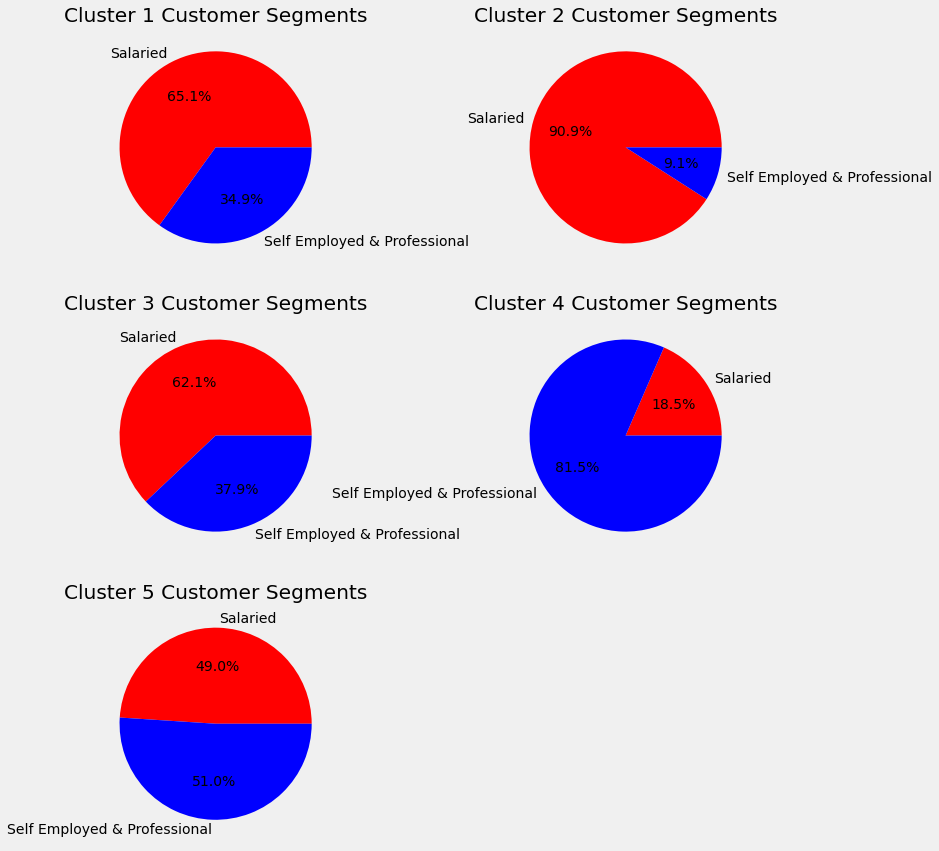

In [489]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))

dff[dff['cluster'] == 0]['Customer_Segment'].value_counts().sort_index().plot(kind='pie', ax=axs[0,0], ylabel='', title='Cluster 1 Customer Segments', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')
dff[dff['cluster'] == 1]['Customer_Segment'].value_counts().sort_index().plot(kind='pie', ax=axs[0,1], ylabel='', title='Cluster 2 Customer Segments', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')
dff[dff['cluster'] == 2]['Customer_Segment'].value_counts().sort_index().plot(kind='pie', ax=axs[1,0], ylabel='', title='Cluster 3 Customer Segments', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')
dff[dff['cluster'] == 3]['Customer_Segment'].value_counts().sort_index().plot(kind='pie', ax=axs[1,1], ylabel='', title='Cluster 4 Customer Segments', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')
dff[dff['cluster'] == 4]['Customer_Segment'].value_counts().sort_index().plot(kind='pie', ax=axs[2,0], ylabel='', title='Cluster 5 Customer Segments', colors=['r','b','g','gray','y','purple'], autopct='%.1f%%')
dff[dff['cluster'] == 5]['Customer_Segment'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[2,1],ylabel='',autopct='%.1f%%')

# **Multivariate Analysis**

# **Days Past Due Distribution on Gender Basis**

In [490]:
df = px.data.tips()
fig = px.histogram(dff[dff['cluster'] == 0], x=" DPD",color='GENDER', nbins=30,title='DPD distribution for cluster 1')
fig.show()

In [491]:
df = px.data.tips()
fig = px.histogram(dff[dff['cluster'] == 1], x=" DPD",color='GENDER', nbins=30,title='DPD distribution for cluster 2')
fig.show()

In [492]:
df = px.data.tips()
fig = px.histogram(dff[dff['cluster'] == 2], x=" DPD",color='GENDER', nbins=30,title='DPD distribution for cluster 3')
fig.show()

In [493]:
df = px.data.tips()
fig = px.histogram(dff[dff['cluster'] == 3], x=" DPD",color='GENDER', nbins=30,title='DPD distribution for cluster 4')
fig.show()

In [494]:
df = px.data.tips()
fig = px.histogram(dff[dff['cluster'] == 4], x=" DPD",color='GENDER', nbins=27,title='DPD distribution for cluster 5')
fig.show()

# **Loan Term Distribution on Gender Basis**

In [495]:
df = px.data.tips()
fig = px.histogram(dff[dff['cluster'] == 0], x="Loan Term",color='GENDER', nbins=30,title='Loan Term distribution for cluster 1')
fig.show()

In [496]:
df = px.data.tips()
fig = px.histogram(dff[dff['cluster'] == 1], x="Loan Term",color='GENDER', nbins=30,title='Loan Term distribution for cluster 2')
fig.show()

In [497]:
df = px.data.tips()
fig = px.histogram(dff[dff['cluster'] == 2], x="Loan Term",color='GENDER', nbins=30,title='Loan Term distribution for cluster 3')
fig.show()

In [498]:
df = px.data.tips()
fig = px.histogram(dff[dff['cluster'] == 3], x="Loan Term",color='GENDER', nbins=30,title='Loan Term distribution for cluster 4')
fig.show()

In [499]:
df = px.data.tips()
fig = px.histogram(dff[dff['cluster'] == 4], x="Loan Term",color='GENDER', nbins=30,title='Loan Term distribution for cluster 5')
fig.show()

In [500]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

# **Total O/S correlations with Age and DPD**

**AGE vs Total O/S for all clusters**

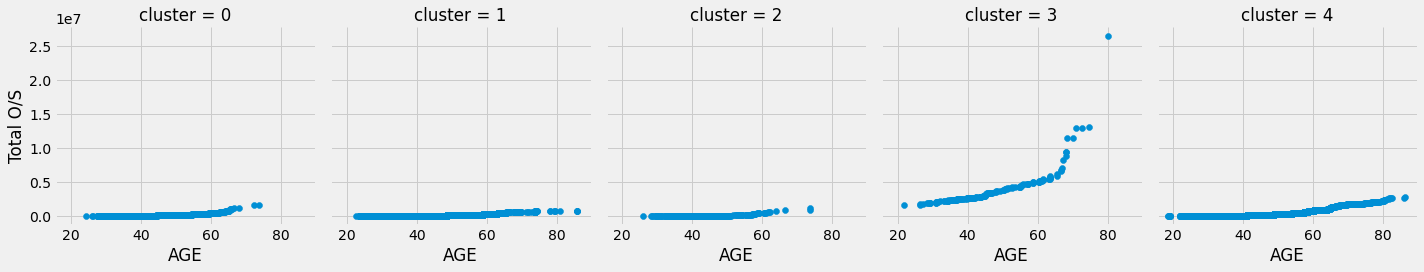

In [501]:
g = sns.FacetGrid(dff, col="cluster", height=4)
g.map(qqplot,"AGE" ,"Total O/S")


**DPD vs Total O/S**

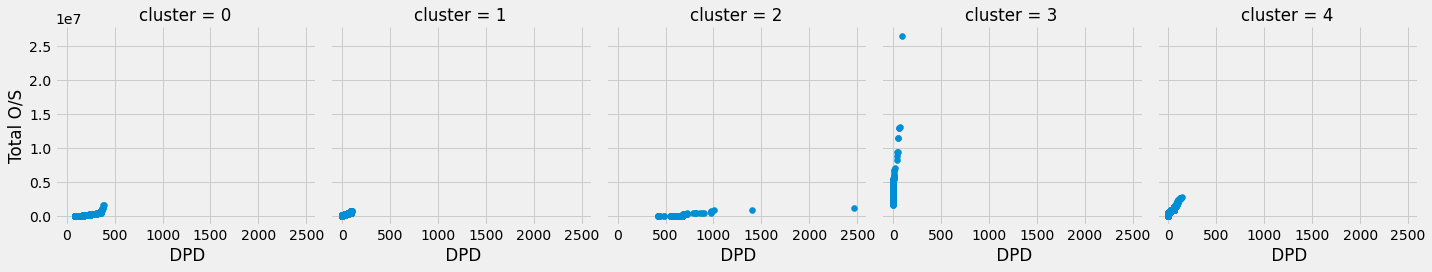

In [502]:
g = sns.FacetGrid(dff, col="cluster", height=4)
g.map(qqplot, " DPD","Total O/S")

# **Total O/S correlations with Age and DPD**

**AGE vs Loan Term**

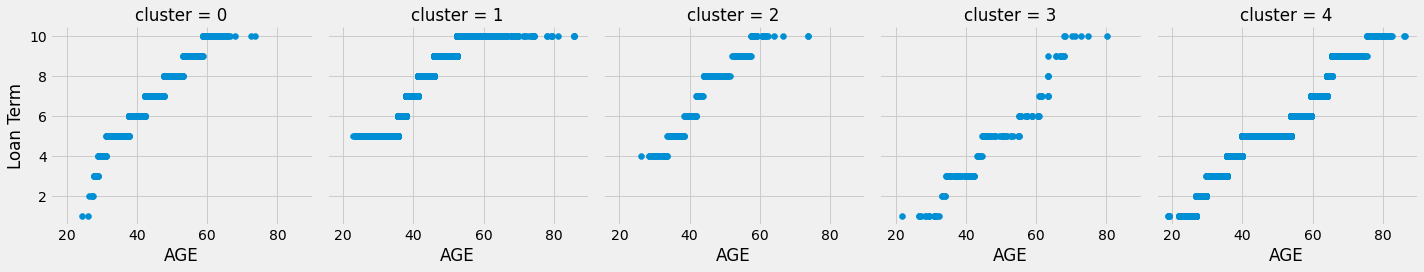

In [503]:
g = sns.FacetGrid(dff, col="cluster", height=4)
g.map(qqplot, "AGE","Loan Term")

**DPD vs Loan Term**

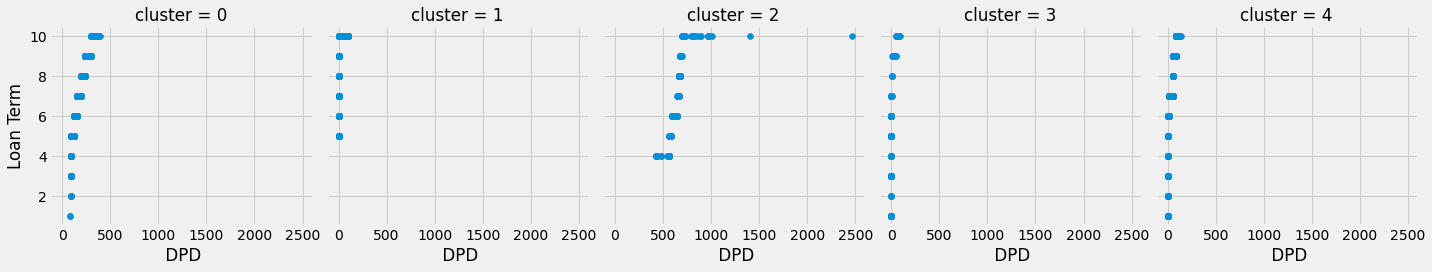

In [504]:
g = sns.FacetGrid(dff, col="cluster", height=4)
g.map(qqplot, " DPD","Loan Term")

# **Conclusion**

As per our model choices for the data, we concluded that not enough data is present to make an educated choice. We conducted unsupervised analysis on data columns and clustered samples to get a clearer understanding of the trends in the given dataset. Upon which we realised that most of the columns are dependent on each other and therefore do not provide enough feature selection to create a robust model. For Model creation, more independent features regarding customers are needed, with better quality control over data collection ,as a lot of samples contained unnecessary or nonsensical data that hampered the usability of the dataset.
